<a href="https://colab.research.google.com/github/DarkMagicianK/MLpracticos2022/blob/main/ML_2022_Tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1.1 - Casos covid
---
En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.

a) Hay variables que puedan ser razonablemente consideradas normales?

b) Hay variables que tienen un comportamiento sospechoso?

In [1]:
# Librerias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.stats import norm

# Funciones extras
def ajuste_norm(data,ax):
    mu, std = norm.fit(data);
    xmin,xmax = ax.get_xlim();
    x = np.linspace(xmin, xmax, 50);
    p = norm.pdf(x, mu, std);
    ax.plot(x, p, 'k', linewidth=2)

# Seteo de variables
url_file = 'https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv'
url_file = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
data_covid = pd.read_csv(url_file)
namecols = data_covid.columns

data_table.enable_dataframe_formatter()
data_covid
#data_table.disable_dataframe_formatter()


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


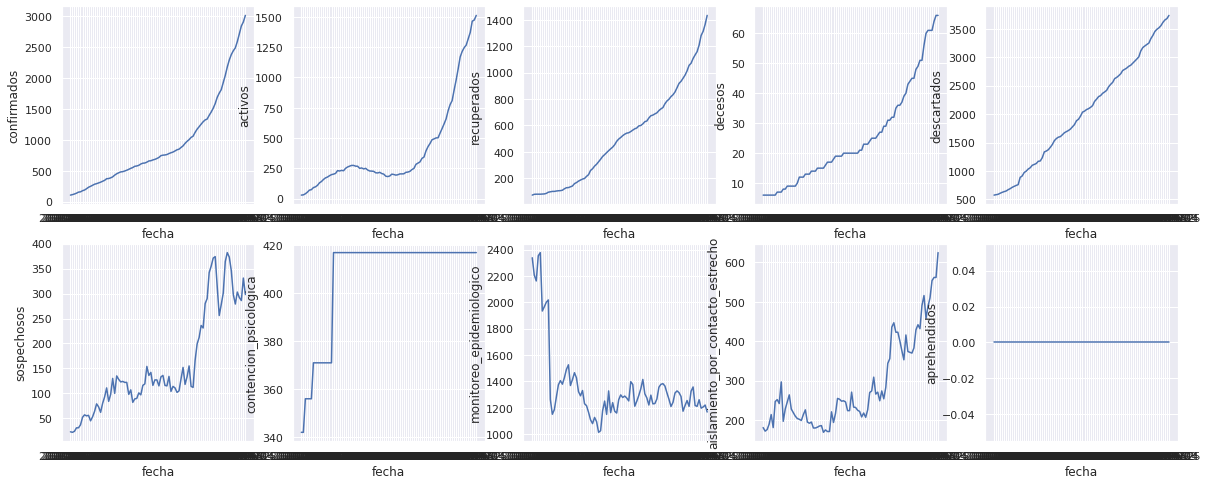

In [2]:
# Plots de cols respecto al tiempo
#sns.pairplot(data_covid,diag_kind="kde")

_, ax1 = plt.subplots(2,5, figsize = ( 20, 8));
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_covid, ax=ax1[ax_row][i%5])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


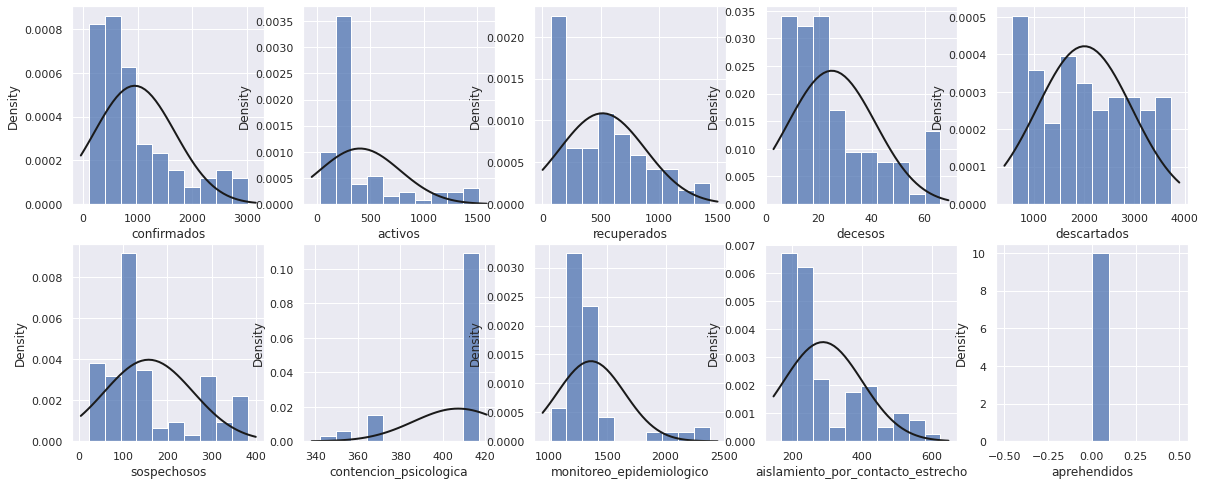

In [3]:
# Histogramas de cols
_, ax2 = plt.subplots(2,5, figsize = ( 20, 8))
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_covid, bins=10, stat='density', ax=ax2[ax_row][i%5])

  # Ajute normal
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  ajuste_norm(data_covid[namecols[i+1]],ax2[ax_row][i%5])  

# Conclusiones
---
a) Según los plots e histogramas obtenidos, ninguna variable presenta indicios de una distribución normal.
Podria decirse que la variable, *descartados* presenta una tendencia a una distribucion uniforme.

b)
Comportamiento sospechoso: La variable,

** contencion_psicologica*: presenta dos cluster definidos. Puede deberse a la saturación del equipo de trabajo.

** monitoreo_epidemiologico*: presenta dos cluster definidos tambien. En epoca de crecemiento de casos de covid, puede que la baja a la mitad practicamente se deba a una politica ministerial. En uno de los clusters se exhibe un comportamiento gausiano.


# Ejercicio N 1.2 - Camas covid
---

In [4]:
# Librerias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.stats import norm

#%% Ejercicio N°1 -Camas covid
url_file_camas = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv';
data_camas = pd.read_csv(url_file_camas);
namecols = data_camas.columns;
#data_table.enable_dataframe_formatter()
del data_camas[namecols[0]];
namecols = data_camas.columns;
orden = data_camas.shape;
nro_cols = orden[1];
data_camas

,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


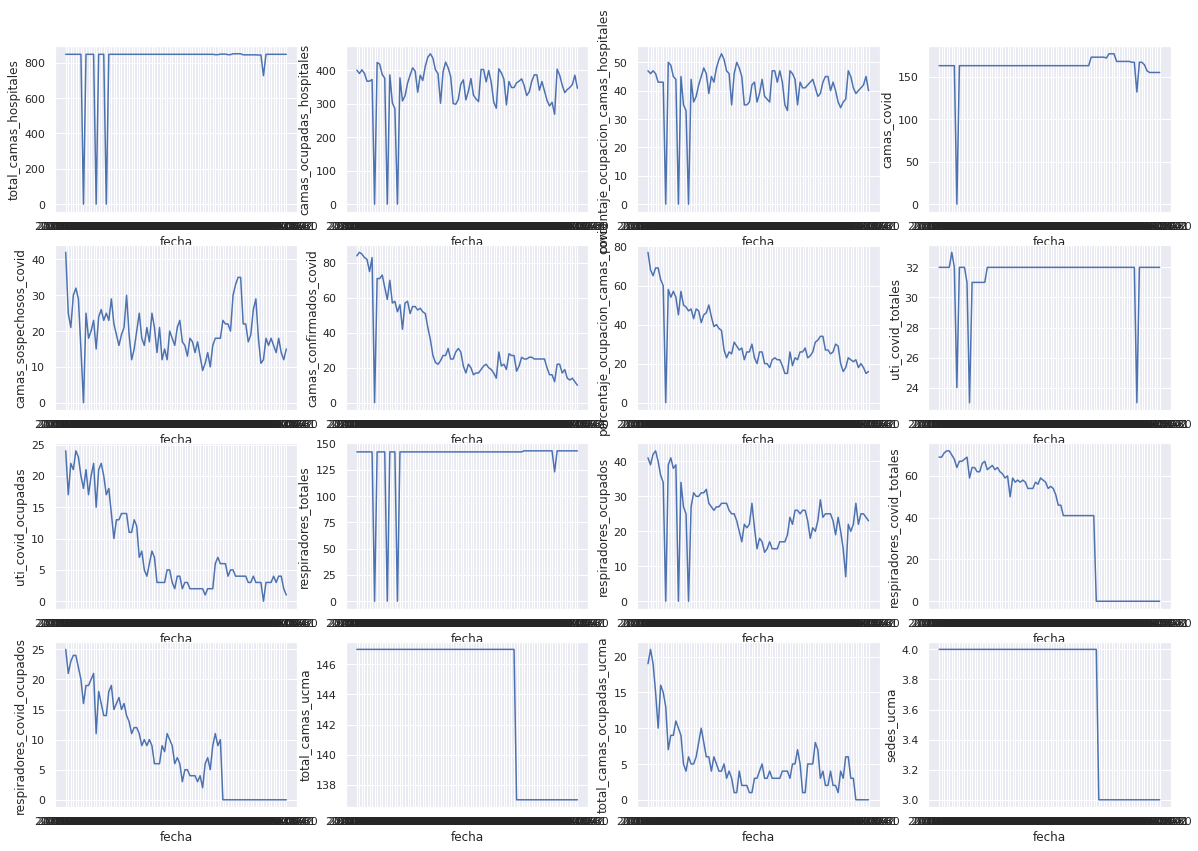

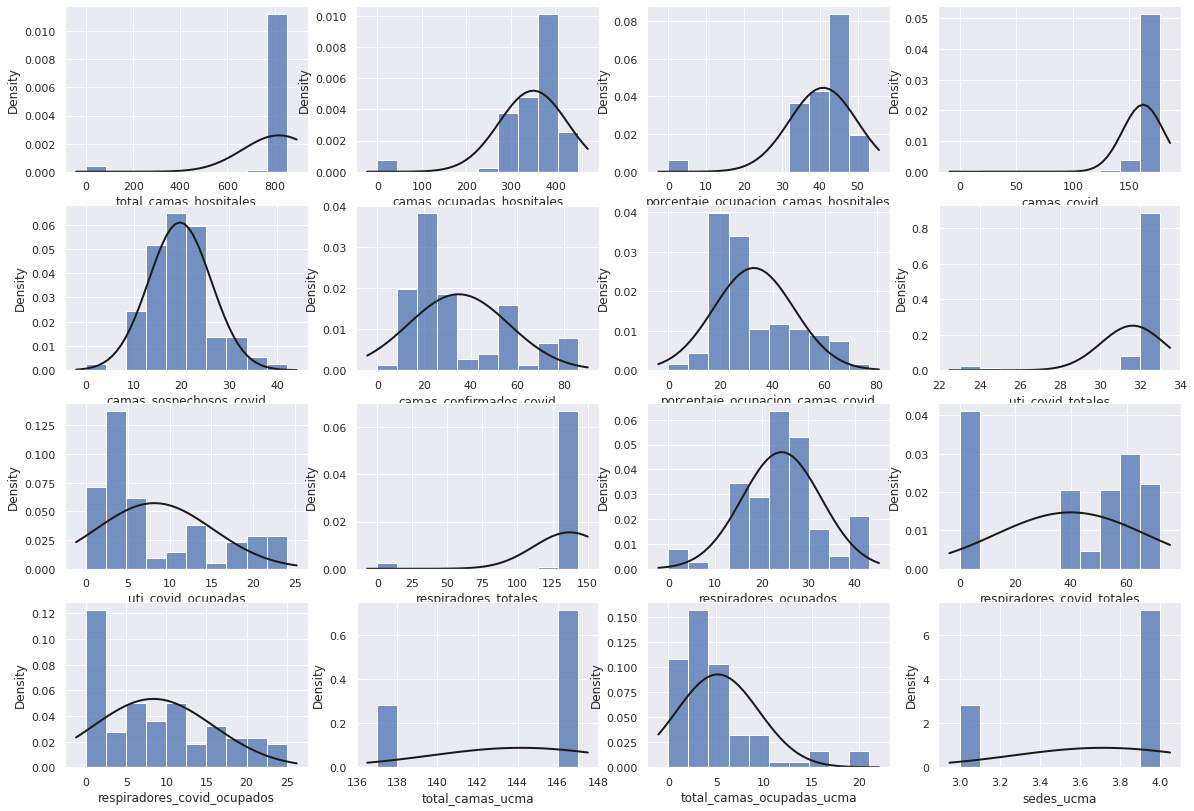

In [5]:

#sns.pairplot(data_camas,diag_kind="kde")
# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas, ax=ax1[ax_row][i%4])

#
# Histogramas de cols
_, ax2 = plt.subplots(4,4, figsize = ( 20, 14))
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_camas, bins=10,stat='density', ax=ax2[ax_row][i%4])  

# Ajute normal
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  ajuste_norm(data_camas[namecols[i+1]],ax2[ax_row][i%4])  

#sns.pairplot(data_camas,diag_kind="kde")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


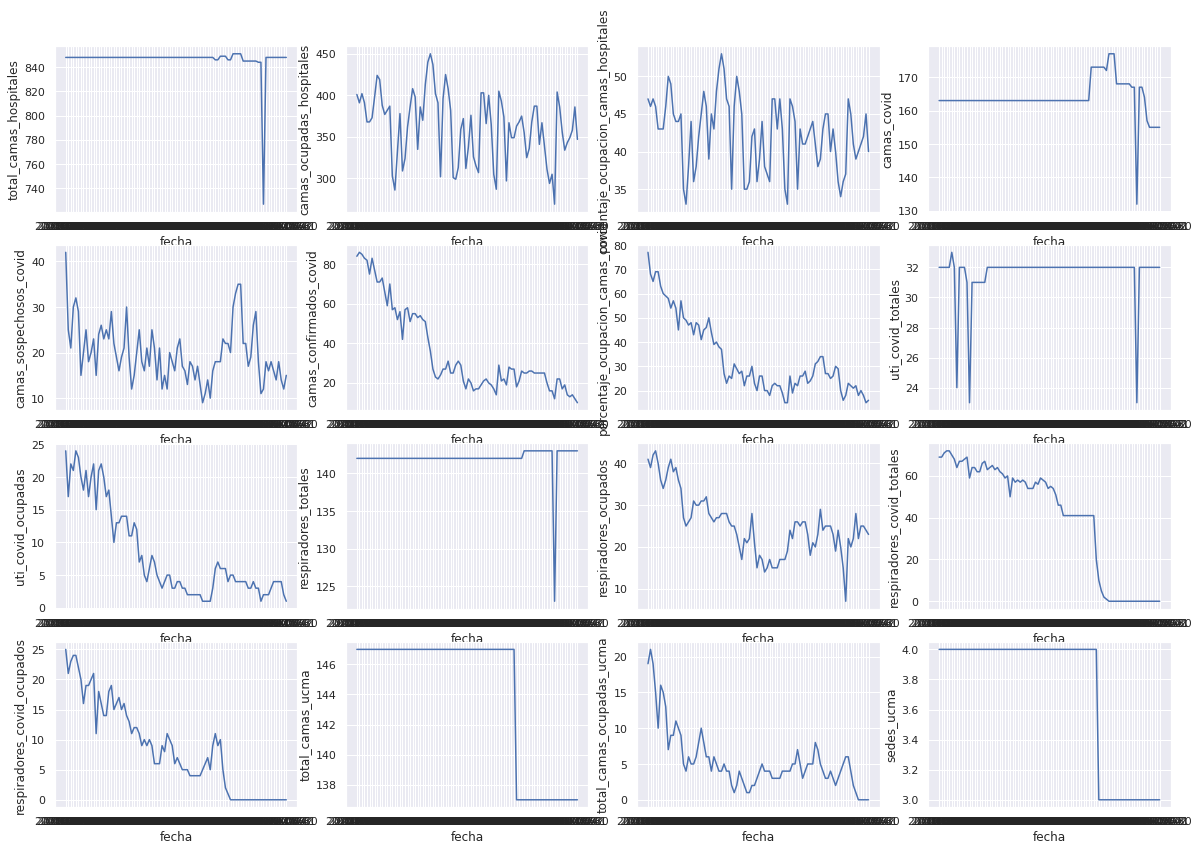

In [6]:
# Funciones extras

# eliminación de outlier
def lier_out_basic(data,cols):
  cols = cols[1:-1]
  #print("Variables -> ",cols)#,'\n', "Cantidad -> ", cols.shape)

  for col in range(cols.size):
    dato = data[cols[col]]
    for i in range(dato.size)[1:-1]:
      if dato[i] < 4:
        #dato[i] = np.mean([dato[i-1],dato[i+1]])
        dato[i] = (dato[i-1] + dato[i+1])/2
    data[cols[col]] = dato
  return data

data_camas_out = lier_out_basic(data_camas,namecols)

# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas_out, ax=ax1[ax_row][i%4])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


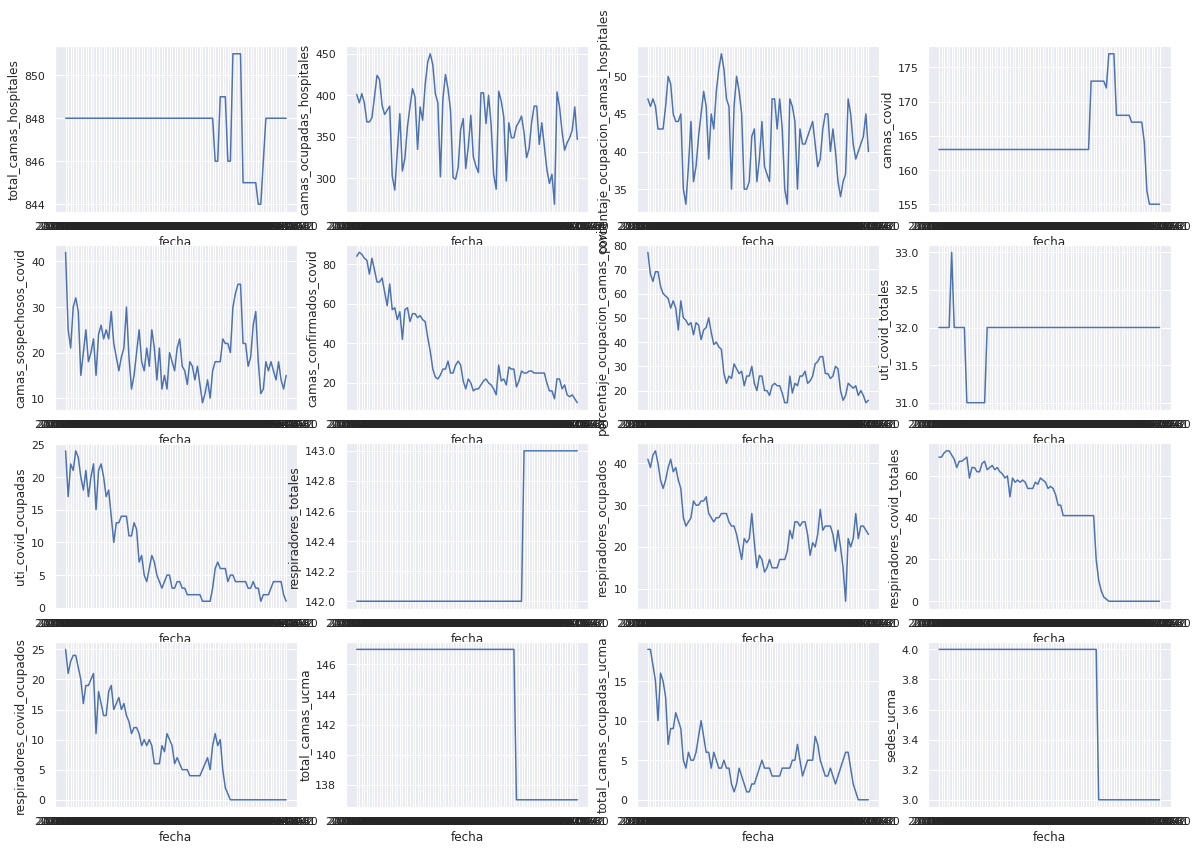

In [7]:
# eliminación de outlier
  # Funciones extras
def lier_out_np(data,cols):
  umbral = 3 # en cantidad de desvio
  cols = cols[1:-1]
  for col in range(cols.size):
    dato = data[cols[col]]
    q3 = dato.quantile(0.75);
    q1 = dato.quantile(0.25);
    desvio = dato.std();

    for i in range(dato.size)[1:-1]:
      if (dato[i] < q1-umbral*desvio) or (dato[i] > q3+umbral*desvio):
        dato[i] = (dato[i-1] + dato[i+1])/2

    data[cols[col]] = dato
  return data

data_camas_out = lier_out_np(data_camas,namecols)

# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas_out, ax=ax1[ax_row][i%4])

q3 -> 32.311525387208896 y q1 -> 31.688474612791104
paso por aca, en la it  5
paso por aca, en la it  11
paso por aca, en la it  12
paso por aca, en la it  13
paso por aca, en la it  14
paso por aca, en la it  15
paso por aca, en la it  16
paso por aca, en la it  17
paso por aca, en la it  18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


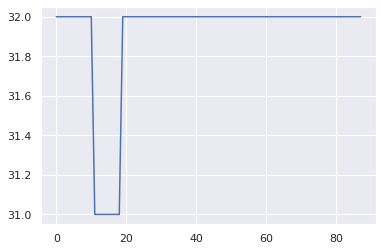

In [8]:
cols = namecols[8]
dato = data_camas[cols]
#print(dato)

q3 = dato.quantile(0.75);
q1 = dato.quantile(0.25);
desvio = dato.std();

print ("q3 ->", q3+desvio, "y q1 ->",q1-desvio)
for i in range(dato.size)[1:-1]:
  if (dato[i] < q1-desvio) or (dato[i] > q3+desvio):
    print("paso por aca, en la it ", i)
    #dato[i] = np.mean([dato[i-1],dato[i+1]])
    dato[i] = (dato[i-1] + dato[i+1])/2

dato
plt.plot(dato)


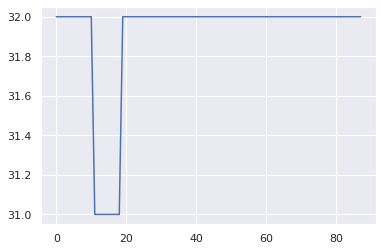

In [9]:
cols = namecols[8]
dato = data_camas[cols]
plt.plot(dato)


q3 -> 32.289127249413106 y q1 -> 31.710872750586898
paso por aca, en la it  11
paso por aca, en la it  12
paso por aca, en la it  13
paso por aca, en la it  14
paso por aca, en la it  15
paso por aca, en la it  16
paso por aca, en la it  17
paso por aca, en la it  18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


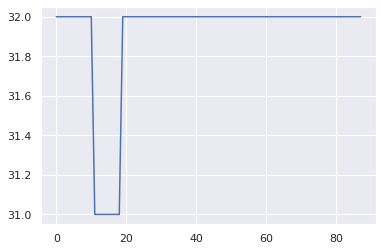

In [10]:
cols = namecols[8]
dato = data_camas[cols]
#print(dato)

q3 = dato.quantile(0.75);
q1 = dato.quantile(0.25);
desvio = dato.std();

print ("q3 ->", q3+desvio, "y q1 ->",q1-desvio)
for i in range(dato.size)[1:-1]:
  if (dato[i] < q1-desvio) or (dato[i] > q3+desvio):
    print("paso por aca, en la it ", i)
    #dato[i] = np.mean([dato[i-1],dato[i+1]])
    dato[i] = (dato[i-1] + dato[i+1])/2

dato
plt.plot(dato)


# Conclusiones
---
a) Según los histogramas obtenidos, "camas_ocupadas_hospitales",camas_sospechosos_covid", presentan a priori una distribución normal sobre su soporte(descartando los outliers por datos faltantes).
** Podria decirse que la variable, *descartados* presenta una tendencia a una distribucion uniforme.

b)


# Ejercicio N°2
Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?

Text(0.5, 1.0, 'Clase B')

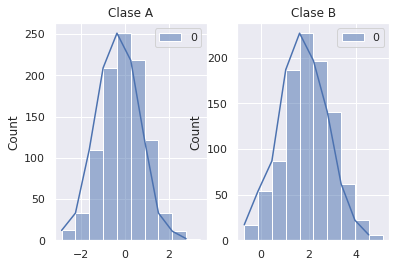

In [11]:
#@title Generación de las dos clases
#import inspector
#inspector.watch_globals()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")


# Funciones adicionales
def clasificador(datos,T):
    prediccion = np.zeros(datos.shape);
    prediccion[datos > T] = 1;
    return(prediccion);

def indicadores(clase,prediccion,N):
    # np.sum(prediccion): cant. total de detecciones + (suma predicciones positivas))
    # N:                  cant. total casos correctos (suma de condiciones positivas)

    TP = np.sum( np.logical_and(clase,prediccion));
    PP = np.sum(prediccion > 0.5)
    Precision = TP/PP; 
    Sensibilidad = TP/N;
    return((Precision,Sensibilidad))    
    
# Generacón de Datos Sinteticos
N = 1000; # Cantidad de datos
[muA, sigmaA] = [0, 1]; # media y desvio estandar
[muB, sigmaB] = [2, 1]; # media y desvio estandar
datosA = np.random.normal(muA, sigmaA, size=(N,1)); #creando muestra de datosA
datosB = np.random.normal(muB, sigmaB, N)[:,None]; #creando muestra de datosB
claseA = np.zeros(datosA.shape);
claseB = np.ones(datosB.shape);
Datos = np.concatenate((datosA,datosB));
Clases = np.concatenate( (claseA,claseB) );
Predicciones = np.zeros(Clases.shape);
#%%
# Graficando histograma
# histograma de distribución normal.
_,ax = plt.subplots(1,2)
sns.histplot(data=datosA, bins=10, ax=ax[0])
sns.histplot(data=datosB, bins=10, ax=ax[1])
#_,ax1 = plt.subplots(1,2)
countA,xA = np.histogram(datosA);
countB,xB = np.histogram(datosB);
ax[0].plot(xA[0:len(xA)-1],countA);
ax[1].plot(xB[0:len(xB)-1],countB);

ax[0].set_title('Clase A')
ax[1].set_title('Clase B')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5, 1.0, 'Precisión vs Recall')

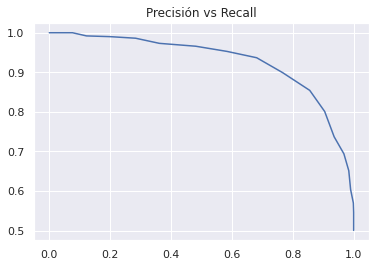

In [12]:
# Clasificación e indicadores
T_vec = np.linspace(Datos.min(), Datos.max(),30);
Precision = np.zeros(T_vec.shape);
Sensibilidad = np.zeros(T_vec.shape);
  
for i in range(T_vec.size):
    T = T_vec[i];
    Predicciones = clasificador(Datos,T);
    # Indicadores
    pys = indicadores(Clases,Predicciones,N); # N es  ant. total casos correctos (suma de condiciones positivas)
    Precision[i] = pys[0];
    Sensibilidad[i] = pys[1];

plt.plot(Sensibilidad,Precision);
plt.title('Precisión vs Recall')


#%%
#sns.pairplot(data_covid,diag_kind="kde")